# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import os
from sklearn.feature_selection import chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_excel("/kaggle/input/churn-prediction-data-science-weekly/Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [3]:
for i in df.columns.tolist():
    print(f"{i} unique values is {df[i].unique()}")

Customer ID unique values is [   0    1    2 ... 7040 7041 7042]
Tenure Months unique values is [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Location unique values is ['Jakarta' 'Bandung']
Device Class unique values is ['Mid End' 'High End' 'Low End']
Games Product unique values is ['Yes' 'No' 'No internet service']
Music Product unique values is ['Yes' 'No' 'No internet service']
Education Product unique values is ['No' 'Yes' 'No internet service']
Call Center unique values is ['No' 'Yes']
Video Product unique values is ['No' 'Yes' 'No internet service']
Use MyApp unique values is ['No' 'Yes' 'No internet service']
Payment Method unique values is ['Digital Wallet' 'Pulsa' 'Debit' 'Credit']
Monthly Purchase (Thou. IDR) unique values is [ 70.005  91.91  129.545 ... 140.855  82.03  102.31 ]
Churn Label unique va

# Data Understanding

# Target Feature
- Churn Label - Whether the customer left the company in this quarter

# Categorical Data
- Location - The city customer is in (Jakarta, Bandung)
- Device - Device classification 
- Games Product - Whether the customer uses internet services for games product
- Music Product - Whether the customer uses internet services for Music product
- Education Product - Whether the customer uses the internet service for education product
- Call Center - Whether the customer uses the call center service
- Video Product - Whether the customer uses video product service
- Use MyApp - Whether the customer uses MyApp service
- Payment Method - The method used for paying the bill

# Numerical Data
- Tenure Months - How long the customer has been with the company by the end of the quarter specified above
- Monthly Purchase - Total customer’s monthly spent for all services with the unit of thousands of IDR
- CLTV - Customer Lifetime Value with the unit of thousands of IDR - Calculated using company's formulas

# Exploratory Data Analysis

In [4]:
df.shape

(7043, 16)

## Check Null Values

In [5]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

Data has not null values

# Check Duplicated Data

In [6]:
df.duplicated().sum()

0

# Data Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

# Descriptive Statistic

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,7043.0,3521.000000,2033.283305,0.000000,1760.500000,3521.000000,5281.50000,7042.00000
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.00000,72.00000
Monthly Purchase (Thou. IDR),7043.0,84.190200,39.117061,23.725000,46.150000,91.455000,116.80500,154.37500
Longitude,7043.0,107.043246,0.358316,106.816666,106.816666,106.816666,107.60981,107.60981
Latitude,7043.0,-6.404184,0.322898,-6.914744,-6.914744,-6.200000,-6.20000,-6.20000
CLTV (Predicted Thou. IDR),7043.0,5720.384481,1537.974298,2603.900000,4509.700000,5885.100000,6994.65000,8450.00000


# Plot target feature

In [9]:
fig = px.pie(data_frame=df, names="Churn Label")
fig.show()

Churn label is imbalanced dataset


In [10]:
df_corr = df.copy()
df_corr["Churn Label"].replace({"Yes" : 1, "No":0}, inplace=True)
df_corr.drop("Customer ID",axis=1, inplace=True)

In [11]:
categorical_features = df_corr.select_dtypes(include="object").columns.tolist()

In [12]:
def encode_label(df_series):
    if df_series.dtype == "object":
        df_series = LabelEncoder().fit_transform(df_series)
    return df_series

In [13]:
df_corr = df_corr.apply(lambda x : encode_label(x))
df_corr.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


In [14]:
fig = px.bar(df_corr.corr()["Churn Label"].sort_values(ascending=False),
                  color = "value")
fig.show()

- Latitude, Longitude, Video Product, and Use MyApp has correlation values closer to 0. All of them has no relationship to Churn Label.

# Check Geography Data by Customer

In [15]:
fig = px.scatter_mapbox(df.groupby(['Latitude','Longitude'])['Customer ID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['Customer ID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
#Check longitude and latitude data
df[["Longitude","Latitude"]].value_counts()

Longitude   Latitude 
106.816666  -6.200000    5031
107.609810  -6.914744    2012
Name: count, dtype: int64

## Tenure Month by Customer

In [17]:
fig = px.histogram(data_frame=df,x="Tenure Months", color="Churn Label", marginal="box",color_discrete_sequence = ["pink","purple"])
fig.show()

In [18]:
#Search
df.groupby("Churn Label")["Tenure Months"].quantile([0.25,0.50,0.75])

Churn Label      
No           0.25    15.0
             0.50    38.0
             0.75    61.0
Yes          0.25     2.0
             0.50    10.0
             0.75    29.0
Name: Tenure Months, dtype: float64

Custome

In [19]:
#Mean tenure who churn and not
df.groupby("Churn Label")["Tenure Months"].mean()

Churn Label
No     37.569965
Yes    17.979133
Name: Tenure Months, dtype: float64

## Monthly Purchases

In [20]:
fig = px.histogram(data_frame=df,x="Monthly Purchase (Thou. IDR)", color="Churn Label", marginal="box",color_discrete_sequence = ["pink","purple"])
fig.show()

In [21]:
df.groupby("Churn Label")["Monthly Purchase (Thou. IDR)"].quantile([0.25,0.5,0.75])

Churn Label      
No           0.25     32.6300
             0.50     83.7525
             0.75    114.9200
Yes          0.25     72.9950
             0.50    103.5450
             0.75    122.4600
Name: Monthly Purchase (Thou. IDR), dtype: float64

Monthly purchases medina from customer who churn in higher from not churn

In [22]:
df.groupby("Churn Label")["Monthly Purchase (Thou. IDR)"].mean()

Churn Label
No     79.644661
Yes    96.773732
Name: Monthly Purchase (Thou. IDR), dtype: float64

## CLTV

In [23]:
fig = px.histogram(data_frame=df,x="CLTV (Predicted Thou. IDR)", color="Churn Label", marginal="box",color_discrete_sequence = ["pink","purple"])
fig.show()

In [24]:
df.groupby("Churn Label")["CLTV (Predicted Thou. IDR)"].quantile([0.25,0.5,0.75])

Churn Label      
No           0.25    4736.875
             0.50    6006.000
             0.75    7065.175
Yes          0.25    4031.300
             0.50    5509.400
             0.75    6715.800
Name: CLTV (Predicted Thou. IDR), dtype: float64

In [25]:
df.groupby("Churn Label")["CLTV (Predicted Thou. IDR)"].mean()

Churn Label
No     5838.197739
Yes    5394.239058
Name: CLTV (Predicted Thou. IDR), dtype: float64

# Location

In [26]:
def histplot(df,x,color):
    fig = px.histogram(data_frame = df, x = x, color = color, 
                   color_discrete_sequence = ["green",'red'])
    fig.show()
histplot(df, "Location", "Churn Label")

In [27]:
def pieplot(df, var_names):
    fig = px.pie(df.groupby(["Churn Label",var_names])["Customer ID"].count().reset_index(),
            values = "Customer ID",
            names = "Churn Label",
            facet_col = var_names,
            color_discrete_sequence = ["red","green"])
    fig.show()
pieplot(df,"Location")

## Device Class

In [28]:
histplot(df, "Device Class", "Churn Label")

In [29]:
pieplot(df, "Device Class")

## Games Product

In [30]:
histplot(df, "Games Product", "Churn Label")

In [31]:
pieplot(df, "Games Product")

## Music Product

In [32]:
histplot(df, "Music Product", "Churn Label")

## Education Product

In [33]:
histplot(df, "Education Product", "Churn Label")

In [34]:
pieplot(df, "Education Product")

## Call Center

In [35]:
histplot(df, "Call Center", "Churn Label")

In [36]:
pieplot(df, "Call Center")

## Video Product

In [37]:
histplot(df, "Video Product", "Churn Label")

In [38]:
pieplot(df, "Video Product")

## UseMyApp

In [39]:
histplot(df, "Use MyApp", "Churn Label")

In [40]:
pieplot(df, "Use MyApp")

## Payment Method

In [41]:
histplot(df, "Payment Method", "Churn Label")

In [42]:
pieplot(df, "Payment Method")

## Montly Purchases by Device Class

In [104]:
fig = px.histogram(data_frame=df,x="Monthly Purchase (Thou. IDR)", color="Device Class", marginal="box")
fig.show()

# Feature Engineering

## Feature Scaling

In [43]:
#Feature Scaling
mms = MinMaxScaler()
df_fe = df.copy()
feature_mms = df.select_dtypes(include="number").drop("Customer ID", axis=1).columns.tolist()
df_fe[feature_mms] = mms.fit_transform(df[feature_mms])

In [44]:
df_fe.drop("Customer ID", axis=1,inplace=True)

## Label Encoding

In [45]:
# Change Churn Label Yes = 1 and No = 0
df_fe["Churn Label"].replace(to_replace="Yes", value=1, inplace=True)
df_fe["Churn Label"].replace(to_replace="No", value=0, inplace=True)

In [46]:
df_fe = df_fe.apply(lambda x : encode_label(x))
df_fe.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0.027778,1,2,2,2,0,0,0,0,2,0.354229,1,0.0,1.0,0.274850
1,0.027778,1,0,0,0,0,0,0,0,3,0.521891,1,0.0,1.0,0.155215
2,0.111111,1,0,0,0,2,0,2,2,3,0.809950,1,0.0,1.0,0.749166
3,0.388889,1,0,0,0,2,1,2,2,3,0.861194,1,0.0,1.0,0.667111
4,0.680556,1,0,0,2,2,0,2,2,1,0.850249,1,0.0,1.0,0.742050


# Feature Selection

In [47]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [48]:
categorical_features = ['Location','Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp','Payment Method']
numerical_features = ["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)",  "Longitude", "Latitude"]

## Chi Square Test

Null Hypothesis (H0): There is no significance relationship between the categorical features and the target feature Churn Label.

Alternate Hypothesis (H1): is that there is a significant relationship between the categorical features and the target feature Churn Label.

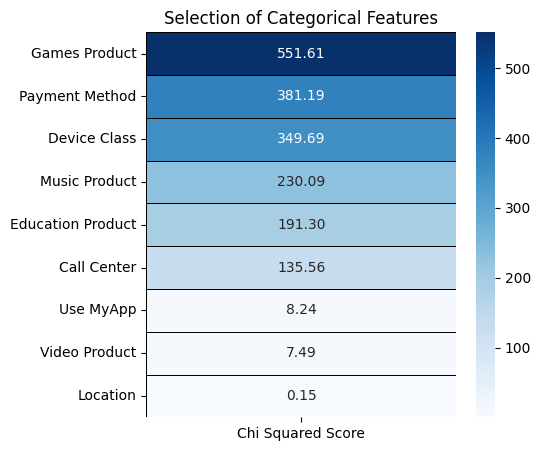

In [49]:
features = df_fe[categorical_features]
target = df_fe['Churn Label']

best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_,index = list(features.columns),columns=['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

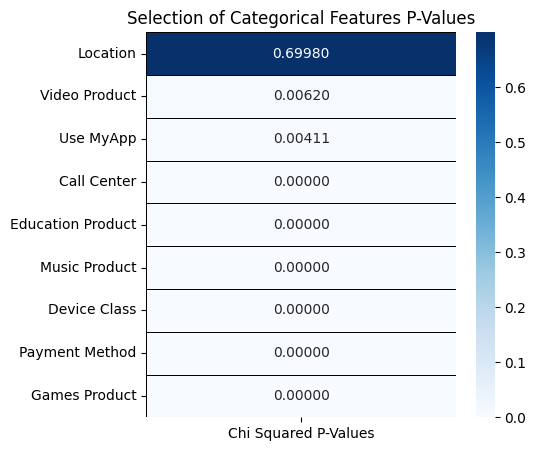

In [50]:
#Calculate p-values for reject null hypothesis
pvalues = pd.DataFrame(data=fit.pvalues_,index = list(features.columns),columns=['Chi Squared P-Values'])

plt.subplots(figsize = (5,5))
sns.heatmap(pvalues.sort_values(ascending = False, by="Chi Squared P-Values"),annot = True,cmap = "Blues",linewidths = 0.4,linecolor = 'black',fmt = '.5f');
plt.title('Selection of Categorical Features P-Values');

If p-values > 0.05 we can reject the null hypothesis. Feature location is not relation to Churn. So we don't use feature Location for modelling

## ANOVA

Null Hypothesis (H0): There is no significance relationship between the numerical features and the target feature Churn Label.

Alternate Hypothesis (H1): is that there is a significant relationship between the numerical features and the target feature Churn Label.

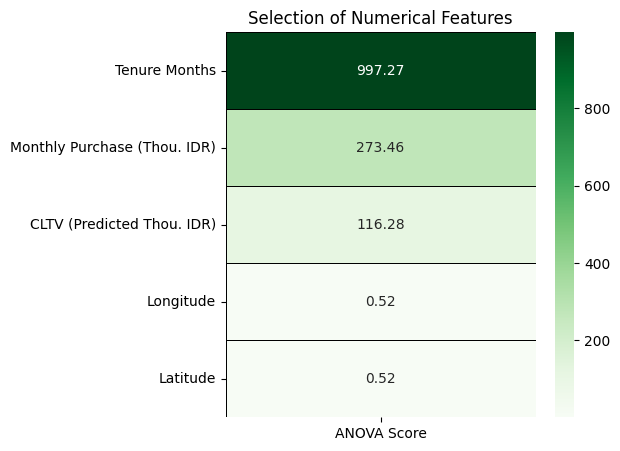

In [51]:
features = df_fe[numerical_features]
target = df_fe['Churn Label'].values

best_features = SelectKBest(score_func  = f_classif, k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending=False, by = 'ANOVA Score'),
            annot = True, cmap="Greens", linewidths = 0.4, linecolor='black', fmt = '.2f')
plt.title('Selection of Numerical Features');

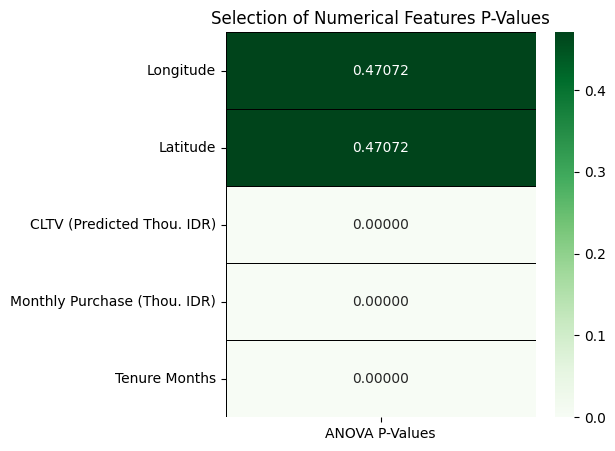

In [52]:
#Calculate p-values for reject null hypothesis
pvalues = pd.DataFrame(data=fit.pvalues_,index = list(features.columns),columns=['ANOVA P-Values'])

plt.subplots(figsize = (5,5))
sns.heatmap(pvalues.sort_values(ascending = False, by="ANOVA P-Values"),annot = True,cmap = "Greens",linewidths = 0.4,linecolor = 'black',fmt = '.5f');
plt.title('Selection of Numerical Features P-Values');

P-Values of Longitude and Latitude is greater than 0.05. So we can reject the null hypothesis. Then, we don't use them to feature for modelling

# Split Data

In [53]:
from sklearn.model_selection import train_test_split
df_model = df_fe.copy()
df_model = df_model.drop(columns = ["Location", "Longitude", "Latitude"])
X = df_model.drop("Churn Label", axis = 1)
y = df_model["Churn Label"].values
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, 
                                                    random_state = random_seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 11), (1409, 11), (5634,), (1409,))

# Modelling

In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

In [65]:
models = [("SVM", SVC()),
    ("RF", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42)),
    ("LogisticRegression", LogisticRegression(random_state=42))]

In [66]:
def scoring_models(models, X_train, y_train, X_test, y_test):
    results_df = pd.DataFrame(columns = ["Model", "Accuracy_Train", "Accuracy_Test",
                                         "Recall_Train", "Recall_Test", 
                                         "Precision_Train", "Precision_Test",
                                         "F1_Score_Train", "F1_Score_Test"])
    for name_model, model in models:
        model.fit(X_train,y_train)
        test_pred = model.predict(X_test)
        train_pred = model.predict(X_train)
        accuracy_train = accuracy_score(train_pred,y_train)
        f1_train = f1_score(train_pred,y_train,average="weighted")
        recall_train = recall_score(train_pred,y_train,average="weighted")
        precision_train = precision_score(train_pred, y_train, average="weighted")
        accuracy_test = accuracy_score(test_pred,y_test)
        f1_test = f1_score(test_pred,y_test, average="weighted")
        recall_test = recall_score(test_pred,y_test, average="weighted")
        precision_test = precision_score(test_pred, y_test, average = "weighted")
        results_df = pd.concat([results_df,pd.DataFrame({"Model":name_model,
                                   "Accuracy_Train":accuracy_train,
                                   "Accuracy_Test" : accuracy_test,
                                   "Recall_Train" : recall_train,
                                   "Recall_Test" : recall_test,
                                   "Precision_Train":precision_train,
                                   "Precision_Test":precision_test,
                                   "F1_Score_Train":f1_train,
                                   "F1_Score_Test":f1_test}, index = [0])], ignore_index = True)
    return results_df

In [67]:
results = scoring_models(models, X_train, y_train, X_test, y_test)
results

,Model,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Score_Train,F1_Score_Test
0,SVM,0.798722,0.778566,0.798722,0.778566,0.844658,0.823198,0.814692,0.793949
1,RF,0.999823,0.770050,0.999823,0.770050,0.999823,0.796496,0.999823,0.779977
2,XGBoost,0.944444,0.777857,0.944444,0.777857,0.947937,0.798107,0.945411,0.785603
3,LightGBM,0.883387,0.782825,0.883387,0.782825,0.892567,0.807606,0.886490,0.791953
4,LogisticRegression,0.796237,0.785664,0.796237,0.785664,0.822576,0.813409,0.806109,0.795661


In [68]:
fig = px.bar(data_frame=results, x = "Model", y = ["F1_Score_Train","F1_Score_Test"],
            labels = {"value":"f1_score"},
            barmode="group",
            text_auto = ".3f")
fig.show()

The best model is not overfitting is Logistic Regression and with highest f1 score test

In [69]:
#Make confusion matriks using model Logistic Regression
def display_confusion_matrix(classifier, X_test, y_test):
     # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='',xticklabels = ["No Churn", "Churn"], yticklabels = ["No Churn","Churn"])
    return plt.show()

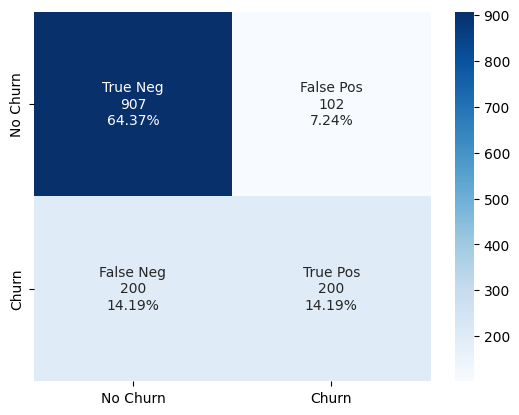

In [70]:
model_logreg = LogisticRegression(random_state = 42)
model_logreg.fit(X_train, y_train)
display_confusion_matrix(classifier = model_logreg, X_test = X_test, y_test = y_test)

In [71]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42,sampling_strategy = "minority", k_neighbors = 3)

X_train_sm, y_train_sm = smt.fit_resample(X_train,y_train)
X_train_sm.shape, y_train_sm.shape

((8330, 11), (8330,))

In [73]:
result_model = scoring_models(models, X_train_sm, y_train_sm, X_test, y_test)
result_model

,Model,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Score_Train,F1_Score_Test
0,SVM,0.783673,0.726047,0.783673,0.726047,0.787662,0.732575,0.784106,0.713882
1,RF,1.000000,0.760823,1.000000,0.760823,1.000000,0.754256,1.000000,0.755436
2,XGBoost,0.933733,0.759404,0.933733,0.759404,0.934070,0.753168,0.933745,0.755036
3,LightGBM,0.879832,0.760823,0.879832,0.760823,0.881397,0.755380,0.879926,0.753615
4,LogisticRegression,0.760264,0.732434,0.760264,0.732434,0.760308,0.734140,0.760269,0.721260


# Hyperparameter Tuning

## Support Vector Machine (SVM)

In [80]:
svc = SVC()
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

random_search_svc = RandomizedSearchCV(svc,parameters, cv = 5, scoring="f1")
random_search_svc.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='f1')

In [81]:
random_search_svc.score(X_train_sm, y_train_sm), random_search_svc.score(X_test, y_test)

(0.9143053802913845, 0.579064587973274)

## Random Forest

In [82]:
rf = RandomForestClassifier(random_state = 42)
parameters = {
    "n_estimators" : range(50,150,20),
    "criterion" : ["gini","entropy"],
    "max_depth" : range(1,20,1)
}

random_search_rf = RandomizedSearchCV(rf,parameters, cv = 5, scoring="f1")
random_search_rf.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'n_estimators': range(50, 150, 20)},
                   scoring='f1')

In [83]:
random_search_rf.score(X_train_sm,y_train_sm), random_search_rf.score(X_test, y_test)

(0.9885985748218529, 0.6321709786276716)

## XGBoost

In [84]:
import scipy.stats as stats
xgb = XGBClassifier(random_state=42)
parameters = {'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)}

random_search_xgb = RandomizedSearchCV(xgb, parameters, cv = 5, scoring="f1")
random_search_xgb.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a771b6bcf10>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771b6bf2b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771b436bc0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a771b9e99c0>},
                   scoring='f1')

In [85]:
random_search_xgb.score(X_train_sm, y_train_sm), random_search_xgb.score(X_test, y_test)

(0.895859762426479, 0.6352941176470588)

## LGBM

In [86]:
lgbm = lgb.LGBMClassifier(random_state=42)
parameters = {
        'learning_rate':[0.1,0.01,0.05],
        'max_depth': [10, 13],
        'min_child_weight': [0.01, 0.02,0.03],
        'num_leaves': [60, 100]
}

random_search_lgbm = RandomizedSearchCV(lgbm, parameters, cv = 5, scoring = "f1")
random_search_lgbm.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [10, 13],
                                        'min_child_weight': [0.01, 0.02, 0.03],
                                        'num_leaves': [60, 100]},
                   scoring='f1')

In [87]:
random_search_lgbm.score(X_train_sm, y_train_sm), random_search_lgbm.score(X_test,y_test)

(0.9396653311336318, 0.6118721461187214)

## Logistic Regression

In [88]:
logreg = LogisticRegression(random_state=42)
parameters = {"penalty":["l2","l1"],
             "C":[2.00,1.00,0.8],
             "intercept_scaling" : [1,2,3]
             }
random_search_logreg = RandomizedSearchCV(logreg, parameters, cv = 5, scoring = "f1")
random_search_logreg.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [2.0, 1.0, 0.8],
                                        'intercept_scaling': [1, 2, 3],
                                        'penalty': ['l2', 'l1']},
                   scoring='f1')

In [89]:
random_search_logreg.score(X_train_sm, y_train_sm), random_search_logreg.score(X_test,y_test)

(0.7614382988890217, 0.6117404737384141)

In [90]:
# best_params
svc_params = random_search_svc.best_params_
rf_params = random_search_rf.best_params_
xgb_params = random_search_xgb.best_params_
lgbm_params = random_search_lgbm.best_params_
logreg_params = random_search_logreg.best_params_

In [93]:
print("svc_params : ", svc_params)
print("rf_params : ", rf_params)
print("xgb_params : ", xgb_params)
print("lgbm_params : ", lgbm_params)
print("logreg_params : ", logreg_params)

svc_params :  {'kernel': 'rbf', 'gamma': 1, 'C': 1000}
rf_params :  {'n_estimators': 130, 'max_depth': 17, 'criterion': 'entropy'}
xgb_params :  {'learning_rate': 0.057580335594252116, 'max_depth': 8, 'n_estimators': 91, 'subsample': 0.787350343260447}
lgbm_params :  {'num_leaves': 100, 'min_child_weight': 0.01, 'max_depth': 10, 'learning_rate': 0.1}
logreg_params :  {'penalty': 'l2', 'intercept_scaling': 2, 'C': 0.8}


# Get the F1-Score to Evaluate Model Hyperparameter Tuning

In [94]:
models_best_params = [("SVM", SVC(**svc_params)),
    ("RF", RandomForestClassifier(**rf_params,random_state=42)),
    ("XGBoost", XGBClassifier(**xgb_params,random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(**lgbm_params,random_state=42)),
    ("LogisticRegression", LogisticRegression(**logreg_params,random_state=42))]

In [95]:
hypertuning_results = scoring_models(models_best_params, X_train_sm, y_train_sm, X_test, y_test)
hypertuning_results

,Model,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Score_Train,F1_Score_Test
0,SVM,0.910324,0.731725,0.910324,0.731725,0.914641,0.723787,0.910518,0.723933
1,RF,0.988475,0.767921,0.988475,0.767921,0.988709,0.762150,0.988477,0.761657
2,XGBoost,0.891597,0.757984,0.891597,0.757984,0.894948,0.755913,0.891779,0.749188
3,LightGBM,0.938535,0.758694,0.938535,0.758694,0.939237,0.752013,0.938557,0.752948
4,LogisticRegression,0.760264,0.732434,0.760264,0.732434,0.760313,0.734140,0.760270,0.721260


In [96]:
fig = px.bar(data_frame=hypertuning_results, x = "Model", y = ["F1_Score_Train","F1_Score_Test"],
            labels = {"value":"f1_score"},
            barmode="group",
            text_auto = ".3f")
fig.show()

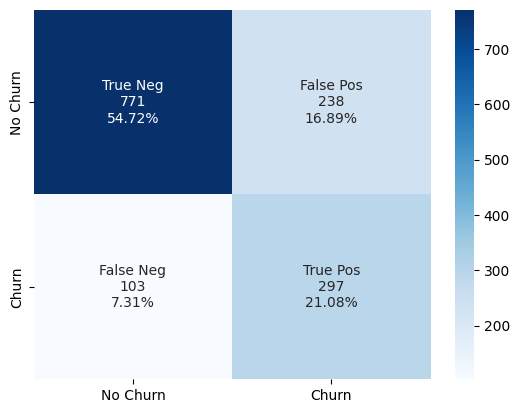

In [97]:
xgb_model = XGBClassifier(**xgb_params, random_state = 42)
xgb_model.fit(X_train_sm, y_train_sm)
display_confusion_matrix(classifier = xgb_model, X_test = X_test, y_test = y_test)

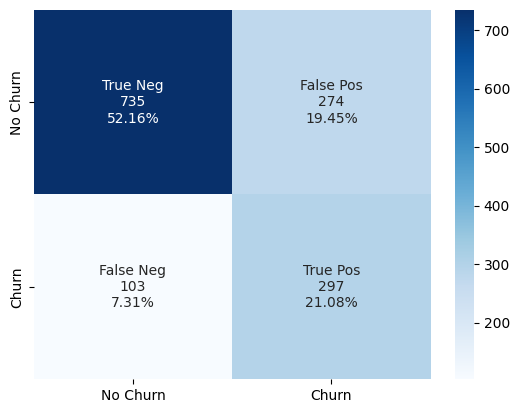

In [156]:
model_logreg = LogisticRegression(**logreg_params, random_state=42)
model_logreg.fit(X_train_sm, y_train_sm)
display_confusion_matrix(classifier = model_logreg, X_test = X_test, y_test = y_test)

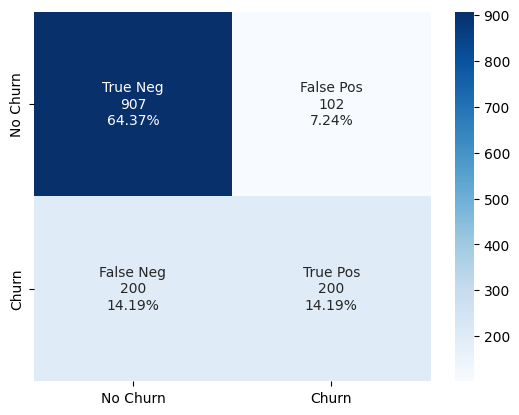

In [98]:
rf_model = RandomForestClassifier(**rf_params,random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
display_confusion_matrix(classifier = model_logreg, X_test = X_test, y_test = y_test)

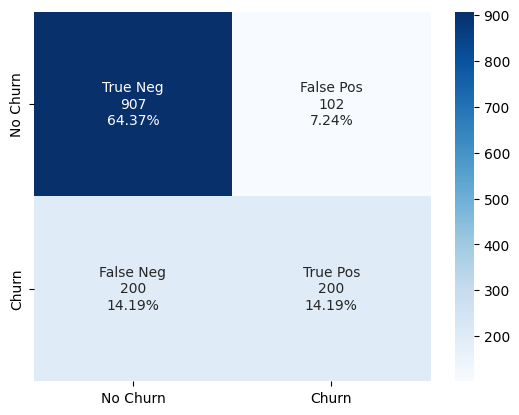

In [99]:
lgbm_model = lgb.LGBMClassifier(**lgbm_params,random_state=42)
lgbm_model.fit(X_train_sm, y_train_sm)
display_confusion_matrix(classifier = model_logreg, X_test = X_test, y_test = y_test)

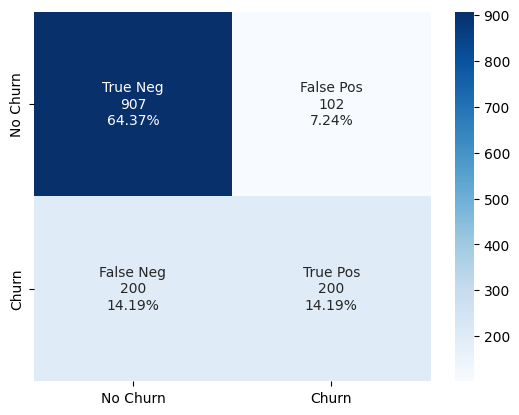

In [100]:
svc_model = SVC(**svc_params)
svc_model.fit(X_train_sm, y_train_sm)
display_confusion_matrix(classifier = model_logreg, X_test = X_test, y_test = y_test)